In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

In [74]:
from google.colab import files
df = pd.read_csv( "/content/drive/MyDrive/C++_project/ML working space/cleaned_beef_cowcalf_expenses.csv")
df.head(10)

,Date,Labour Cost,"Machinery, Equipment & Maintenance",Animal Health & Reproduction,"Lands, Pastures & Infrastructure",Feed & Nutrition,Utilities,Miscellaneous,"Interest, Capital & Fixed Costs",Total_Expenses,...,Season,Labour Cost_Outlier,"Machinery, Equipment & Maintenance_Outlier",Animal Health & Reproduction_Outlier,"Lands, Pastures & Infrastructure_Outlier",Feed & Nutrition_Outlier,Utilities_Outlier,Miscellaneous_Outlier,"Interest, Capital & Fixed Costs_Outlier",Total_Expenses_Outlier
0,2020-01-01,8507.0,2860.0,3294.0,2130.0,6623.5,3224.0,420.0,2838.0,29896.5,...,Winter,False,False,False,False,False,False,False,False,False
1,2020-01-31,7169.0,2466.0,3238.0,1330.0,7126.6,1587.0,772.0,2323.0,26011.6,...,Winter,False,False,False,False,False,False,False,False,False
2,2020-03-01,7919.0,2130.0,3685.0,2332.0,6199.7,1843.0,891.0,2637.0,27636.7,...,Spring,False,False,False,False,False,False,False,False,False
3,2020-03-31,7853.0,4433.0,3215.0,1955.0,8221.2,2684.0,859.0,2537.0,31757.2,...,Spring,False,False,False,False,False,False,False,False,False
4,2020-04-30,5021.0,4300.0,2747.0,1856.0,7632.0,1974.0,458.0,1710.0,25698.0,...,Spring,False,False,False,False,False,False,False,False,False
5,2020-05-30,8753.0,4047.0,4747.0,1975.0,5806.0,1689.0,1086.0,2157.0,30260.0,...,Spring,False,False,False,False,False,False,False,False,False
6,2020-06-29,5562.0,3899.0,3267.0,1831.0,4422.4,2654.0,884.0,1846.0,24365.4,...,Summer,False,False,False,False,False,False,False,False,False
7,2020-07-29,7068.0,4214.0,3297.0,1387.0,3680.0,1815.0,413.0,1441.0,23315.0,...,Summer,False,False,False,False,False,False,False,False,False
8,2020-08-28,7041.0,3363.0,4139.0,2390.0,5602.4,2978.0,827.0,1708.0,28048.4,...,Summer,False,False,False,False,False,False,False,False,False
9,2020-09-27,5775.0,2034.0,4253.0,2104.0,5955.0,3085.0,787.0,2225.0,26218.0,...,Fall,False,False,False,False,False,False,False,False,False


In [75]:
df.columns

Index(['Date', 'Labour Cost', 'Machinery, Equipment & Maintenance',
       'Animal Health & Reproduction', 'Lands, Pastures & Infrastructure',
       'Feed & Nutrition', 'Utilities', 'Miscellaneous',
       'Interest, Capital & Fixed Costs', 'Total_Expenses', 'Year', 'Month',
       'Month_Name', 'Year_Month', 'Total_Expenses_Change',
       'Total_Expenses_Pct_Change', 'YoY_Change', 'YoY_Pct_Change',
       'Labour Cost_Pct_of_Total',
       'Machinery, Equipment & Maintenance_Pct_of_Total',
       'Animal Health & Reproduction_Pct_of_Total',
       'Lands, Pastures & Infrastructure_Pct_of_Total',
       'Feed & Nutrition_Pct_of_Total', 'Utilities_Pct_of_Total',
       'Miscellaneous_Pct_of_Total',
       'Interest, Capital & Fixed Costs_Pct_of_Total',
       'Total_Expenses_Pct_of_Total', 'Season', 'Labour Cost_Outlier',
       'Machinery, Equipment & Maintenance_Outlier',
       'Animal Health & Reproduction_Outlier',
       'Lands, Pastures & Infrastructure_Outlier', 'Feed & Nutrit

In [76]:
assert {'Date','Year','Month','Total_Expenses'}.issubset(df.columns), \
    "CSV must contain Date, Year, Month, Total_Expenses."

# Ensure Date is parsed, sort, and deduplicate monthly
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').drop_duplicates(subset=['Date'], keep='last').reset_index(drop=True)

print(f"Rows after sorting/dedup: {len(df)}")
df.head(3)

Rows after sorting/dedup: 60


,Date,Labour Cost,"Machinery, Equipment & Maintenance",Animal Health & Reproduction,"Lands, Pastures & Infrastructure",Feed & Nutrition,Utilities,Miscellaneous,"Interest, Capital & Fixed Costs",Total_Expenses,...,Season,Labour Cost_Outlier,"Machinery, Equipment & Maintenance_Outlier",Animal Health & Reproduction_Outlier,"Lands, Pastures & Infrastructure_Outlier",Feed & Nutrition_Outlier,Utilities_Outlier,Miscellaneous_Outlier,"Interest, Capital & Fixed Costs_Outlier",Total_Expenses_Outlier
0,2020-01-01,8507.0,2860.0,3294.0,2130.0,6623.5,3224.0,420.0,2838.0,29896.5,...,Winter,False,False,False,False,False,False,False,False,False
1,2020-01-31,7169.0,2466.0,3238.0,1330.0,7126.6,1587.0,772.0,2323.0,26011.6,...,Winter,False,False,False,False,False,False,False,False,False
2,2020-03-01,7919.0,2130.0,3685.0,2332.0,6199.7,1843.0,891.0,2637.0,27636.7,...,Spring,False,False,False,False,False,False,False,False,False


In [77]:
# Build modeling frame with ONLY the columns we need
mdl = df[['Date','Year','Month','Total_Expenses']].copy()

# Seasonality (no leakage)
mdl['Month_sin'] = np.sin(2*np.pi*mdl['Month']/12.0)
mdl['Month_cos'] = np.cos(2*np.pi*mdl['Month']/12.0)

# Lags (no leakage)
mdl['Total_Lag1']  = mdl['Total_Expenses'].shift(1)
mdl['Total_Lag3']  = mdl['Total_Expenses'].shift(3)
mdl['Total_Lag12'] = mdl['Total_Expenses'].shift(12)

# Rolling mean (PAST ONLY: shift BEFORE roll)
mdl['Rolling_Avg_3'] = mdl['Total_Expenses'].shift(1).rolling(3).mean()

# Simple momentum
mdl['Diff_1'] = mdl['Total_Expenses'].shift(1) - mdl['Total_Expenses'].shift(2)
mdl['Rolling_Avg_6'] = mdl['Total_Expenses'].shift(1).rolling(6).mean()

feature_names = [
    'Year','Month','Month_sin','Month_cos',
    'Total_Lag1','Total_Lag3','Total_Lag12','Rolling_Avg_3','Diff_1',
    'Rolling_Avg_6'
]

# Drop NaNs ONLY on our features and target
mdl = mdl.dropna(subset=feature_names + ['Total_Expenses']).reset_index(drop=True)

print("Usable rows after lags:", len(mdl))
mdl.head(3)


Usable rows after lags: 48


,Date,Year,Month,Total_Expenses,Month_sin,Month_cos,Total_Lag1,Total_Lag3,Total_Lag12,Rolling_Avg_3,Diff_1,Rolling_Avg_6
0,2020-12-26,2020,12,33133.90,-2.449294e-16,1.000000,26020.00,26218.0,29896.5,25861.333333,674.00,25552.133333
1,2021-01-25,2021,1,28709.74,5.000000e-01,0.866025,33133.90,25346.0,26011.6,28166.633333,7113.90,27013.550000
2,2021-02-24,2021,2,28322.97,8.660254e-01,0.500000,28709.74,26020.0,27636.7,29287.880000,-4424.16,27912.673333


In [78]:
X = mdl[feature_names].copy()
y = mdl['Total_Expenses'].copy()

test_horizon = 12 if len(mdl) >= 36 else max(int(len(mdl)*0.2), 6)
test_horizon = min(test_horizon, len(mdl)-1)

X_train, X_test = X.iloc[:-test_horizon], X.iloc[-test_horizon:]
y_train, y_test = y.iloc[:-test_horizon], y.iloc[-test_horizon:]
test_dates = mdl['Date'].iloc[-test_horizon:]

from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def smape(y_true, y_pred):
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    denom = (np.abs(y_true) + np.abs(y_pred))
    denom = np.where(denom == 0, 1e-9, denom)
    return 100.0 * np.mean(2.0 * np.abs(y_pred - y_true) / denom)

def metrics(y_true, y_pred):
    return {
        "R2": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": sqrt(mean_squared_error(y_true, y_pred)),
        "sMAPE%": smape(y_true, y_pred)
    }

# Baselines to beat
mean_pred  = np.full_like(y_test, y_train.mean(), dtype=float)
naive_pred = y.shift(1).iloc[-test_horizon:].values

print("Baseline (mean): ", metrics(y_test.values, mean_pred))
print("Baseline (lag-1):", metrics(y_test.values, naive_pred))


Baseline (mean):  {'R2': -0.29813837424083367, 'MAE': 1843.9599999999998, 'RMSE': 2133.0596935036765, 'sMAPE%': np.float64(6.113521963894172)}
Baseline (lag-1): {'R2': -1.9844832474078231, 'MAE': 2325.662500000001, 'RMSE': 3234.2760730893615, 'sMAPE%': np.float64(7.777812423014807)}


In [79]:
# import numpy as np
# import pandas as pd
# import joblib

# feature_names = joblib.load("feature_names.pkl")  # ensure we match training

# def make_next_month_features(history_df: pd.DataFrame) -> pd.DataFrame:
#     """
#     Build ONE feature row for the *next* month from history_df
#     (must contain >=13 rows of ['Year','Month','Total_Expenses']).
#     Computes only the features listed in feature_names.
#     """
#     hist = history_df[['Year','Month','Total_Expenses']].copy().sort_values(['Year','Month'])
#     assert len(hist) >= 13, "Need at least 13 months of history."

#     # next calendar month/year
#     last_year  = int(hist.iloc[-1]['Year'])
#     last_month = int(hist.iloc[-1]['Month'])
#     next_month = 1 if last_month == 12 else last_month + 1
#     next_year  = last_year + 1 if last_month == 12 else last_year

#     # convenient values from history
#     last_total = float(hist.iloc[-1]['Total_Expenses'])
#     prev_total = float(hist.iloc[-2]['Total_Expenses'])
#     lag3_total = float(hist.iloc[-3]['Total_Expenses'])
#     lag12_total = float(hist.iloc[-12]['Total_Expenses'])

#     feat = {}

#     if 'Year' in feature_names:  feat['Year'] = next_year
#     if 'Month' in feature_names: feat['Month'] = next_month
#     if 'Month_sin' in feature_names:
#         feat['Month_sin'] = float(np.sin(2*np.pi*next_month/12.0))
#     if 'Month_cos' in feature_names:
#         feat['Month_cos'] = float(np.cos(2*np.pi*next_month/12.0))

#     if 'Total_Lag1' in feature_names:  feat['Total_Lag1'] = last_total
#     if 'Total_Lag3' in feature_names:  feat['Total_Lag3'] = lag3_total
#     if 'Total_Lag12' in feature_names: feat['Total_Lag12'] = lag12_total

#     # rolling averages (for NEXT month, use trailing history)
#     if 'Rolling_Avg_3' in feature_names:
#         feat['Rolling_Avg_3'] = float(hist['Total_Expenses'].tail(3).mean())
#     if 'Rolling_Avg_6' in feature_names:  # optional if you added it during training
#         assert len(hist) >= 6, "Need ≥6 months history for Rolling_Avg_6"
#         feat['Rolling_Avg_6'] = float(hist['Total_Expenses'].tail(6).mean())

#     # momentum (past-only)
#     if 'Diff_1' in feature_names:
#         feat['Diff_1'] = last_total - prev_total

#     # create row in the exact training order
#     row = pd.DataFrame([feat]).reindex(columns=feature_names)

#     # hard fail fast if anything is still NaN
#     if row.isna().any().any():
#         missing = row.columns[row.isna().any()].tolist()
#         raise ValueError(f"make_next_month_features produced NaNs for: {missing}. "
#                          f"Ensure these features are computable from history.")
#     return row


In [80]:
# hist = df[['Year','Month','Total_Expenses']].copy()
# feat_next = make_next_month_features(hist)
# model = joblib.load("expense_model.pkl")
# pred_next = float(model.predict(feat_next)[0])
# pred_next



In [81]:
print(f"Total rows: {len(mdl)}")
print(f"Date range: {mdl['Date'].min()} to {mdl['Date'].max()}")
print(f"\nFeature columns: {len(feature_names)}")
print(f"Missing values:\n{mdl[feature_names + ['Total_Expenses']].isnull().sum()}")

Total rows: 48
Date range: 2020-12-26 00:00:00 to 2024-11-05 00:00:00

Feature columns: 10
Missing values:
Year              0
Month             0
Month_sin         0
Month_cos         0
Total_Lag1        0
Total_Lag3        0
Total_Lag12       0
Rolling_Avg_3     0
Diff_1            0
Rolling_Avg_6     0
Total_Expenses    0
dtype: int64


In [82]:
# Critical: Make sure lag features are properly shifted
# Check that Lag1 at row i equals Total_Expenses at row i-1
for i in range(1, min(5, len(mdl))):
    print(f"Row {i}: Total_Expenses={mdl.loc[i, 'Total_Expenses']:.2f}, "
          f"Previous row Total={mdl.loc[i-1, 'Total_Expenses']:.2f}, "
          f"Total_Lag1={mdl.loc[i, 'Total_Lag1']:.2f}")
    # Total_Lag1 should equal previous row's Total_Expenses

Row 1: Total_Expenses=28709.74, Previous row Total=33133.90, Total_Lag1=33133.90
Row 2: Total_Expenses=28322.97, Previous row Total=28709.74, Total_Lag1=28709.74
Row 3: Total_Expenses=33115.02, Previous row Total=28322.97, Total_Lag1=28322.97
Row 4: Total_Expenses=23585.57, Previous row Total=33115.02, Total_Lag1=33115.02


In [83]:
mdl[feature_names].describe()

,Year,Month,Month_sin,Month_cos,Total_Lag1,Total_Lag3,Total_Lag12,Rolling_Avg_3,Diff_1,Rolling_Avg_6
count,48.000000,48.000000,4.800000e+01,4.800000e+01,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2022.416667,6.500000,-6.700511e-18,-4.546038e-17,29889.165417,29684.764167,29057.783333,29783.391111,112.921667,29635.571146
std,1.163877,3.488583,7.145896e-01,7.145896e-01,2807.663887,2922.126954,3057.376236,1932.877137,3741.214275,1618.325425
min,2020.000000,1.000000,-1.000000e+00,-1.000000e+00,22367.180000,22367.180000,22367.180000,25861.333333,-9529.450000,25552.133333
25%,2021.000000,3.750000,-5.915064e-01,-5.915064e-01,28360.095000,28138.780000,27474.322500,28561.500833,-2596.992500,28259.827917
50%,2022.000000,6.500000,-6.123234e-17,-6.123234e-17,29824.465000,29490.190000,28979.625000,30051.890000,-6.575000,29898.416667
75%,2023.000000,9.250000,5.915064e-01,5.915064e-01,31845.157500,31845.157500,31341.707500,31161.054167,2973.545000,30666.170000
max,2024.000000,12.000000,1.000000e+00,1.000000e+00,36000.070000,36000.070000,36000.070000,33647.366667,8929.710000,32787.266667


In [84]:
# How many months of data do you have?
n_months = len(mdl)
print(f"Months of data: {n_months}")
print(f"Recommended test size: {max(6, n_months//5)} months")  # 20% or min 6 months

Months of data: 48
Recommended test size: 9 months


In [85]:
print("usable rows after lags:", len(mdl))

usable rows after lags: 48


In [86]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
def pipe(model, needs_scaling=False):
# Start with SIMPLE models that can't overfit as easily
  models = {
    "Ridge_0.1":    pipe(Ridge(alpha=0.1), needs_scaling=True),
    "Ridge_1.0":    pipe(Ridge(alpha=1.0), needs_scaling=True),
    "Ridge_10":     pipe(Ridge(alpha=10.0), needs_scaling=True),
    "Ridge_100":    pipe(Ridge(alpha=100.0), needs_scaling=True),

    "Lasso_0.1":    pipe(Lasso(alpha=0.1, max_iter=10000), needs_scaling=True),
    "Lasso_1.0":    pipe(Lasso(alpha=1.0, max_iter=10000), needs_scaling=True),

    "ElasticNet":   pipe(ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000), needs_scaling=True),

    # Much simpler tree models
    "RF_Simple":    pipe(RandomForestRegressor(
        n_estimators=50,      # Down from 300
        max_depth=3,          # Down from 12
        min_samples_split=8,  # Force more samples per split
        min_samples_leaf=4,   # Force more samples per leaf
        random_state=42
    )),

    "GBM_Simple":   pipe(GradientBoostingRegressor(
        n_estimators=50,      # Down from 800
        max_depth=2,          # Down from 3
        learning_rate=0.01,   # Slower learning
        min_samples_split=8,
        random_state=42
    )),
}

# Re-run your training loop with these models
rows, trained = [], {}
for name, pl in models.items():
    pl.fit(X_train, y_train)
    y_tr = pl.predict(X_train)
    y_te = pl.predict(X_test)
    rows.append({
        "Model": name,
        "Train_R2": r2_score(y_train, y_tr),
        "Test_R2": r2_score(y_test,  y_te),
        "Test_MAE": mean_absolute_error(y_test, y_te),
        "Test_RMSE": sqrt(mean_squared_error(y_test, y_te)),
        "Test_sMAPE%": smape(y_test, y_te),
        "Overfit_Gap_R2": r2_score(y_train, y_tr) - r2_score(y_test, y_te),
    })
    trained[name] = (pl, y_te)

results_df = pd.DataFrame(rows).sort_values(["Test_MAE","Test_sMAPE%"]).reset_index(drop=True)
results_df

,Model,Train_R2,Test_R2,Test_MAE,Test_RMSE,Test_sMAPE%,Overfit_Gap_R2
0,ElasticNet,0.422824,-0.301319,1449.793709,2135.671117,4.802776,0.724143
1,Ridge_10,0.462155,-0.383381,1474.458026,2201.980028,4.875664,0.845536
2,RF_Simple,0.640092,-0.236074,1486.511508,2081.443705,4.946068,0.876166
3,Ridge_100,0.252137,-0.153932,1573.057742,2011.094930,5.214717,0.406069
4,GBM_Simple,0.373586,-0.099664,1639.622017,1963.236300,5.432858,0.473251
5,Ridge_1.0,0.557127,-1.160361,2185.293100,2751.729227,7.003480,1.717488
6,Ridge_0.1,0.571197,-2.010601,2662.221733,3248.397357,8.374000,2.581798
7,Lasso_1.0,0.571519,-2.170774,2730.340603,3333.689407,8.565190,2.742292
8,Lasso_0.1,0.571531,-2.196001,2741.745139,3346.924969,8.597267,2.767532


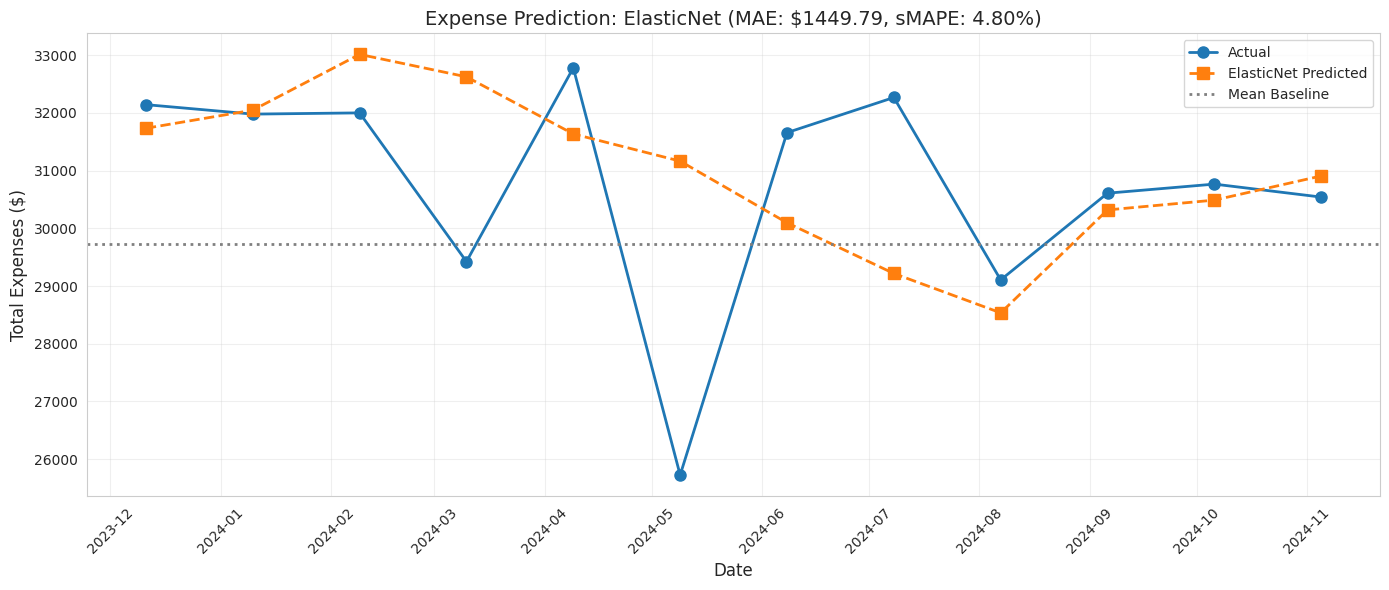

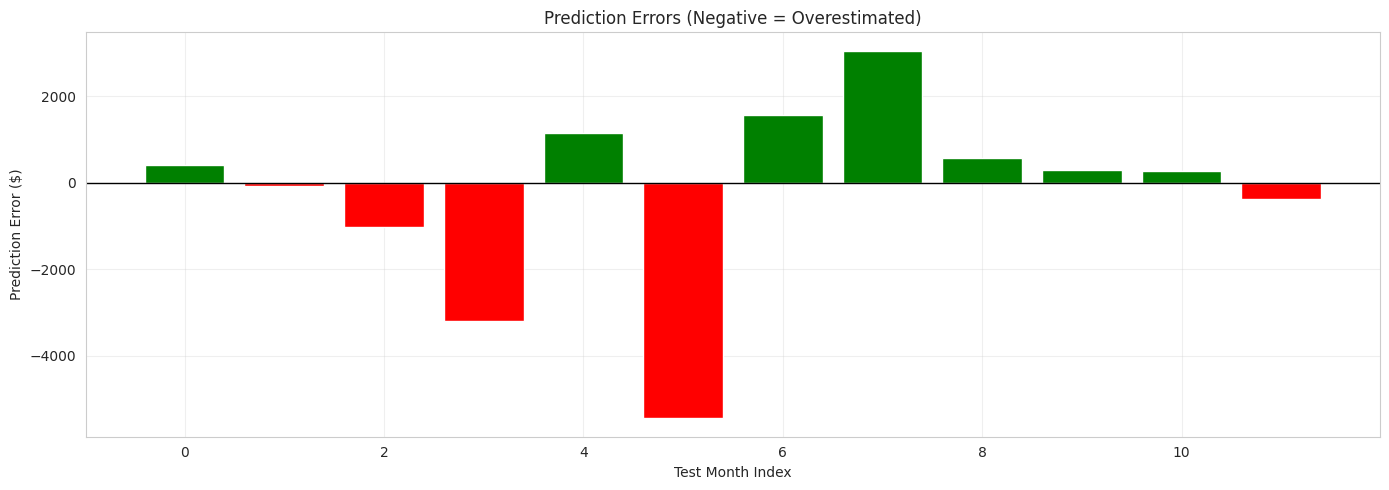

In [87]:
# Get ElasticNet predictions
best_model_name = "ElasticNet"
best_pipeline = models[best_model_name]
best_predictions = best_pipeline.predict(X_test)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(test_dates, y_test.values, 'o-', label='Actual', linewidth=2, markersize=8)
plt.plot(test_dates, best_predictions, 's--', label='ElasticNet Predicted', linewidth=2, markersize=8)
plt.axhline(y_train.mean(), color='gray', linestyle=':', label='Mean Baseline', linewidth=2)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Expenses ($)', fontsize=12)
plt.title(f'Expense Prediction: ElasticNet (MAE: ${mean_absolute_error(y_test, best_predictions):.2f}, sMAPE: {smape(y_test, best_predictions):.2f}%)', fontsize=14)
plt.legend(fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Prediction errors
errors = y_test.values - best_predictions
plt.figure(figsize=(14, 5))
plt.bar(range(len(errors)), errors, color=['red' if e < 0 else 'green' for e in errors])
plt.axhline(0, color='black', linestyle='-', linewidth=1)
plt.xlabel('Test Month Index')
plt.ylabel('Prediction Error ($)')
plt.title('Prediction Errors (Negative = Overestimated)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [88]:
# ElasticNet coefficients
best_model = best_pipeline.named_steps['model']
scaler = best_pipeline.named_steps['scaler']

# Get scaled coefficients
coefs = best_model.coef_
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
}).sort_values('Coefficient', key=abs, ascending=False)

print(feature_importance)

         Feature  Coefficient
2      Month_sin   699.195073
3      Month_cos   611.609337
6    Total_Lag12   485.601379
0           Year   361.017066
9  Rolling_Avg_6  -345.577786
5     Total_Lag3   342.578930
7  Rolling_Avg_3   226.500236
8         Diff_1  -200.244189
4     Total_Lag1   -66.781221
1          Month    60.221430


In [89]:
# Prepare features for next month (December 2024 or your next month)
last_row = mdl.iloc[-1]
next_month_features = {
    'Year': last_row['Year'],  # or +1 if crossing year
    'Month': (last_row['Month'] % 12) + 1,
    'Month_sin': np.sin(2*np.pi*((last_row['Month'] % 12) + 1)/12.0),
    'Month_cos': np.cos(2*np.pi*((last_row['Month'] % 12) + 1)/12.0),
    'Total_Lag1': last_row['Total_Expenses'],
    'Total_Lag3': mdl.iloc[-3]['Total_Expenses'],
    'Total_Lag12': mdl.iloc[-12]['Total_Expenses'],
    'Rolling_Avg_3': mdl['Total_Expenses'].iloc[-3:].mean(),
    'Diff_1': last_row['Total_Expenses'] - mdl.iloc[-2]['Total_Expenses'],
    'Rolling_Avg_6': mdl['Total_Expenses'].iloc[-6:].mean(),
}

X_next = pd.DataFrame([next_month_features])
next_month_pred = best_pipeline.predict(X_next)[0]

print(f"\n Next Month Prediction: ${next_month_pred:,.2f}")
print(f" Based on ElasticNet model with MAE ±${mean_absolute_error(y_test, best_predictions):.2f}")


 Next Month Prediction: $32,135.45
 Based on ElasticNet model with MAE ±$1449.79


In [90]:
# # Prepare features for next month (December 2024 or your next month)
# hist = mdl[['Year','Month','Total_Expenses']].copy()
# feat_next = make_next_month_features(hist) # Use the dedicated function

# # Ensure best_pipeline and best_predictions are available
# best_model_name = results_df.iloc[0]["Model"]
# best_pipeline = trained[best_model_name][0]
# best_predictions = best_pipeline.predict(X_test) # Recalculate best_predictions

# model = joblib.load("expense_model.pkl")
# pred_next = float(model.predict(feat_next)[0])

# print(f"\n Next Month Prediction: ${pred_next:,.2f}")
# print(f"   (Based on {best_model_name} model with MAE ±${mean_absolute_error(y_test, best_predictions):.2f})")

In [91]:
import joblib
from datetime import datetime
from pathlib import Path

# Create directory if needed
Path("models").mkdir(exist_ok=True, parents=True)

# Get the ElasticNet pipeline
best_name = "ElasticNet"
best_pipe = models[best_name]  # This gets the pipeline from your models dict

# Save the model pipeline
joblib.dump(best_pipe, "models/expense_model.pkl")
joblib.dump(feature_names, "models/feature_names.pkl")

# Check if scaling is used in the pipeline
needs_scaling = any(isinstance(step[1], StandardScaler) for step in best_pipe.steps)
joblib.dump(needs_scaling, "models/needs_scaling.pkl")

# Get best model metrics from results_df
best = results_df.iloc[0]  # Top row after sorting

# Save metadata
metadata = {
    "training_date": datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    "rows_total": int(len(df)),
    "rows_model": int(len(mdl)),
    "train_size": int(len(X_train)),
    "test_horizon": int(len(X_test)),
    "best_model": best_name,
    "test_r2": float(best["Test_R2"]),
    "test_mae": float(best["Test_MAE"]),
    "test_rmse": float(best["Test_RMSE"]),
    "test_smape": float(best["Test_sMAPE%"]),
    "train_r2": float(best["Train_R2"]),
    "overfit_gap": float(best["Overfit_Gap_R2"]),
    "baseline_mean_mae": float(mean_absolute_error(y_test, np.full_like(y_test, y_train.mean(), dtype=float))),
    "baseline_naive_mae": float(mean_absolute_error(y_test, y.shift(1).iloc[-len(X_test):].values)),
    "features": feature_names,
    "date_range": f"{mdl['Date'].min()} to {mdl['Date'].max()}"
}
joblib.dump(metadata, "models/model_metadata.pkl")

# Save comparison of all models
results_df.to_csv("models/all_models_comparison.csv", index=False)

print(f" Model: {best_name}")
print(f"Test MAE: ${best['Test_MAE']:.2f}")
print(f" Test sMAPE: {best['Test_sMAPE%']:.2f}%")

 Model: ElasticNet
Test MAE: $1449.79
 Test sMAPE: 4.80%


In [92]:
import joblib
import numpy as np
import pandas as pd

# Load the saved model
loaded_pipe = joblib.load("models/expense_model.pkl")
loaded_features = joblib.load("models/feature_names.pkl")
metadata = joblib.load("models/model_metadata.pkl")

print(f"Loaded model: {metadata['best_model']}")
print(f"Test MAE: ${metadata['test_mae']:.2f}")
print(f"Last training date: {mdl['Date'].iloc[-1]}")

# Get the last row of your data
last_row = mdl.iloc[-1]

# Calculate next month's date
next_month_num = (last_row['Month'] % 12) + 1
next_year = last_row['Year'] if next_month_num > 1 else last_row['Year'] + 1

# Build features for next month
next_month_features = {
    'Year': next_year,
    'Month': next_month_num,
    'Month_sin': np.sin(2 * np.pi * next_month_num / 12.0),
    'Month_cos': np.cos(2 * np.pi * next_month_num / 12.0),
    'Total_Lag1': last_row['Total_Expenses'],  # Last month's total
    'Total_Lag3': mdl['Total_Expenses'].iloc[-3],  # 3 months ago
    'Total_Lag12': mdl['Total_Expenses'].iloc[-12],  # 12 months ago
    'Rolling_Avg_3': mdl['Total_Expenses'].iloc[-3:].mean(),  # Last 3 months avg
    'Diff_1': last_row['Total_Expenses'] - mdl['Total_Expenses'].iloc[-2],  # Recent change
    'Rolling_Avg_6': mdl['Total_Expenses'].iloc[-6:].mean(),  # Last 6 months avg
}

# Create DataFrame with proper column order
X_next = pd.DataFrame([next_month_features])[loaded_features]

# Make prediction
next_month_pred = loaded_pipe.predict(X_next)[0]

print(f"\n FORECAST FOR NEXT MONTH:")
print(f"   Date: {next_year}-{next_month_num:02d}")
print(f"   Predicted Total Expenses: ${next_month_pred:,.2f}")
print(f"   Expected Error Range: ±${metadata['test_mae']:.2f}")
print(f"   Confidence Interval: ${next_month_pred - metadata['test_mae']:,.2f} - ${next_month_pred + metadata['test_mae']:,.2f}")
print(f"\n For context:")
print(f"   Last month actual: ${last_row['Total_Expenses']:,.2f}")
print(f"   3-month average: ${next_month_features['Rolling_Avg_3']:,.2f}")
print(f"   12 months ago: ${next_month_features['Total_Lag12']:,.2f}")

Loaded model: ElasticNet
Test MAE: $1449.79
Last training date: 2024-11-05 00:00:00

 FORECAST FOR NEXT MONTH:
   Date: 2024-12
   Predicted Total Expenses: $32,135.45
   Expected Error Range: ±$1449.79
   Confidence Interval: $30,685.65 - $33,585.24

 For context:
   Last month actual: $30,541.30
   3-month average: $30,638.85
   12 months ago: $32,143.51


In [93]:
# Verify the loaded model works correctly
test_predictions = loaded_pipe.predict(X_test)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f"\n Model Verification:")
print(f"   Loaded model MAE: ${test_mae:.2f}")
print(f"   Saved metadata MAE: ${metadata['test_mae']:.2f}")
print(f"   Match: {abs(test_mae - metadata['test_mae']) < 0.01}")


 Model Verification:
   Loaded model MAE: $1449.79
   Saved metadata MAE: $1449.79
   Match: True


In [94]:
def forecast_next_month(model_path="models/expense_model.pkl"):
    """
    Forecast next month's total expenses using the trained model.
    Returns: (prediction, lower_bound, upper_bound, metadata)
    """
    # Load model and metadata
    pipe = joblib.load(model_path)
    features = joblib.load("models/feature_names.pkl")
    meta = joblib.load("models/model_metadata.pkl")

    # Get last data point
    last_row = mdl.iloc[-1]
    next_month = (last_row['Month'] % 12) + 1
    next_year = last_row['Year'] if next_month > 1 else last_row['Year'] + 1

    # Build features
    X_next = pd.DataFrame([{
        'Year': next_year,
        'Month': next_month,
        'Month_sin': np.sin(2 * np.pi * next_month / 12.0),
        'Month_cos': np.cos(2 * np.pi * next_month / 12.0),
        'Total_Lag1': last_row['Total_Expenses'],
        'Total_Lag3': mdl['Total_Expenses'].iloc[-3],
        'Total_Lag12': mdl['Total_Expenses'].iloc[-12],
        'Rolling_Avg_3': mdl['Total_Expenses'].iloc[-3:].mean(),
        'Diff_1': last_row['Total_Expenses'] - mdl['Total_Expenses'].iloc[-2],
        'Rolling_Avg_6': mdl['Total_Expenses'].iloc[-6:].mean(),
    }])[features]

    # Predict
    pred = pipe.predict(X_next)[0]
    error = meta['test_mae']

    return {
        'date': f"{next_year}-{next_month:02d}",
        'prediction': pred,
        'lower_bound': pred - error,
        'upper_bound': pred + error,
        'expected_error': error,
        'model': meta['best_model'],
        'test_mae': meta['test_mae'],
        'test_smape': meta['test_smape']
    }

# Test it
result = forecast_next_month()
print(f" {result['date']}")
print(f" Forecast: ${result['prediction']:,.2f}")
print(f" Range: ${result['lower_bound']:,.2f} - ${result['upper_bound']:,.2f}")

 2024-12
 Forecast: $32,135.45
 Range: $30,685.65 - $33,585.24


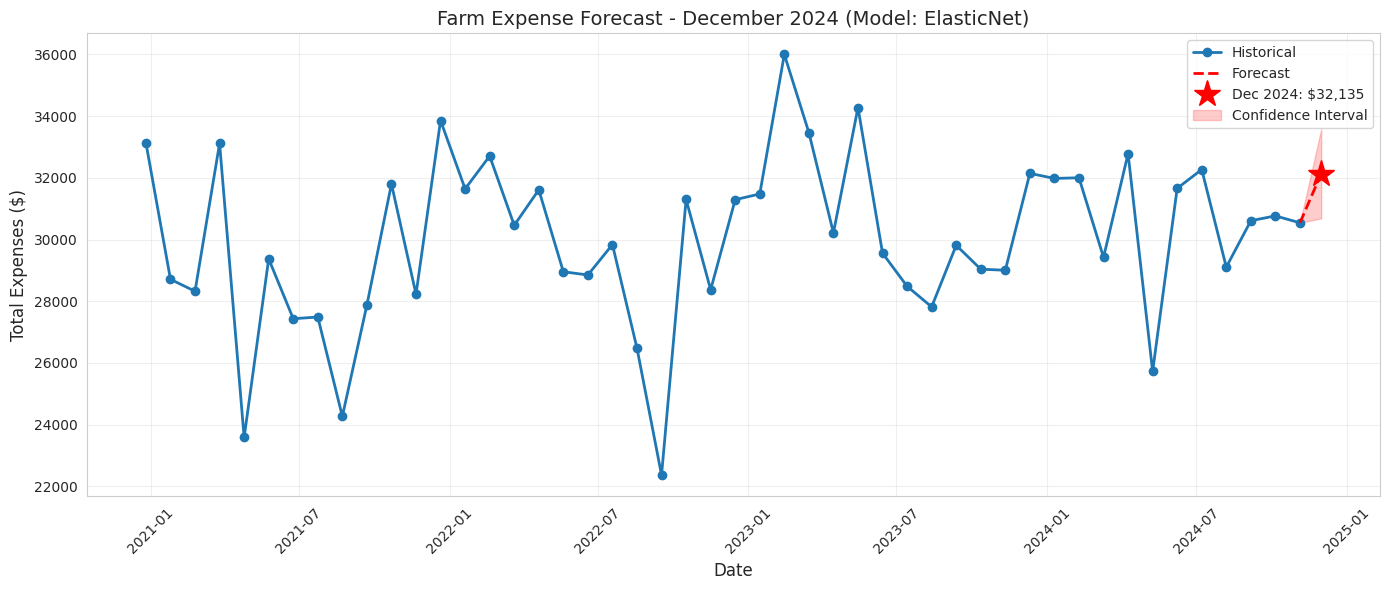

In [95]:
import matplotlib.pyplot as plt

# Get historical data + forecast
historical_dates = mdl['Date'].values
historical_expenses = mdl['Total_Expenses'].values

forecast = forecast_next_month()
next_date = pd.to_datetime(forecast['date'])

# Plot
plt.figure(figsize=(14, 6))
plt.plot(historical_dates, historical_expenses, 'o-', label='Historical', linewidth=2, markersize=6)
plt.plot([historical_dates[-1], next_date],
         [historical_expenses[-1], forecast['prediction']],
         'r--', linewidth=2, label='Forecast')
plt.plot(next_date, forecast['prediction'], 'r*', markersize=20, label=f"Dec 2024: ${forecast['prediction']:,.0f}")

# Confidence interval
plt.fill_between([historical_dates[-1], next_date],
                 [historical_expenses[-1], forecast['lower_bound']],
                 [historical_expenses[-1], forecast['upper_bound']],
                 alpha=0.2, color='red', label='Confidence Interval')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Expenses ($)', fontsize=12)
plt.title(f'Farm Expense Forecast - December 2024 (Model: {forecast["model"]})', fontsize=14)
plt.legend(fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [96]:
def update_model_with_new_month(new_date, new_expense):
    """
    Add new month's data and retrain the model
    """
    # Add new row to dataframe
    new_row = pd.DataFrame([{
        'Date': new_date,
        'Total_Expenses': new_expense,
        # ... add other columns as needed
    }])

    updated_df = pd.concat([df, new_row], ignore_index=True)

    # Re-run the entire pipeline:
    # 1. Feature engineering
    # 2. Train/test split
    # 3. Model training
    # 4. Save updated model

    print(f" Model updated with {new_date}: ${new_expense:,.2f}")

In [97]:
!pip install skl2onnx onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.8 MB/s eta 0:00:00


In [99]:
# from skl2onnx import convert_sklearn
# from skl2onnx.common.data_types import FloatTensorType
# initial_types = [('input', FloatTensorType([None, len(feature_cols)]))]
# onnx_model = convert_sklearn(best_model, initial_types=initial_types)

# with open("best_farm_expense_model.onnx", "wb") as f:
#     f.write(onnx_model.SerializeToString())




In [ ]:
from google.colab import files
files.download("best_farm_expense_model.onnx")